In [3]:
import pandas as pd

In [1]:
import os
os.getcwd()


'C:\\Users\\Mahad Shahid'

In [4]:
df = pd.read_csv("bestsellers.csv")

In [5]:
df.head()


,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [7]:
df.describe()


,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [8]:
df.columns


Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [9]:
df.duplicated().sum()


np.int64(0)

In [10]:
df['Genre'].value_counts()


Genre
Non Fiction    310
Fiction        240
Name: count, dtype: int64

In [11]:
df['Price'].describe()


count    550.000000
mean      13.100000
std       10.842262
min        0.000000
25%        7.000000
50%       11.000000
75%       16.000000
max      105.000000
Name: Price, dtype: float64

In [12]:
df[df['Price'] == 0]


,Name,Author,User Rating,Reviews,Price,Year,Genre
42,"Cabin Fever (Diary of a Wimpy Kid, Book 6)",Jeff Kinney,4.8,4505,0,2011,Fiction
71,"Diary of a Wimpy Kid: Hard Luck, Book 8",Jeff Kinney,4.8,6812,0,2013,Fiction
116,Frozen (Little Golden Book),RH Disney,4.7,3642,0,2014,Fiction
193,JOURNEY TO THE ICE P,RH Disney,4.6,978,0,2014,Fiction
219,Little Blue Truck,Alice Schertle,4.9,1884,0,2014,Fiction
358,The Constitution of the United States,Delegates of the Constitutional,4.8,2774,0,2016,Non Fiction
381,The Getaway,Jeff Kinney,4.8,5836,0,2017,Fiction
461,The Short Second Life of Bree Tanner: An Eclip...,Stephenie Meyer,4.6,2122,0,2010,Fiction
505,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2013,Fiction
506,To Kill a Mockingbird,Harper Lee,4.8,26234,0,2014,Fiction


In [13]:
df['Free'] = df['Price'] == 0


In [14]:
df['Name'] = df['Name'].str.strip()


In [15]:
df['Author'] = df['Author'].str.strip()


In [16]:
top_authors = df['Author'].value_counts().head(10)
top_authors


Author
Jeff Kinney                           12
Suzanne Collins                       11
Gary Chapman                          11
Rick Riordan                          11
American Psychological Association    10
Dr. Seuss                              9
Gallup                                 9
Rob Elliott                            8
Bill O'Reilly                          7
Eric Carle                             7
Name: count, dtype: int64

In [17]:
df.groupby('Genre')['User Rating'].mean()


Genre
Fiction        4.648333
Non Fiction    4.595161
Name: User Rating, dtype: float64

In [18]:
df['Year'].value_counts().sort_index()


Year
2009    50
2010    50
2011    50
2012    50
2013    50
2014    50
2015    50
2016    50
2017    50
2018    50
2019    50
Name: count, dtype: int64

In [19]:
import matplotlib.pyplot as plt


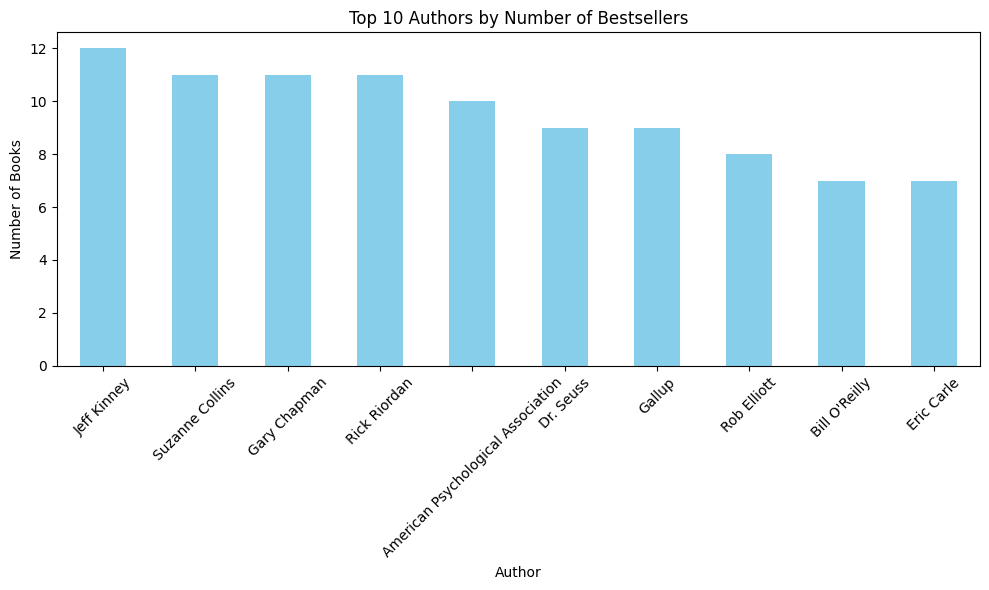

In [20]:
top_authors = df['Author'].value_counts().head(10)

plt.figure(figsize=(10,6))
top_authors.plot(kind='bar', color='skyblue')
plt.title("Top 10 Authors by Number of Bestsellers")
plt.xlabel("Author")
plt.ylabel("Number of Books")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


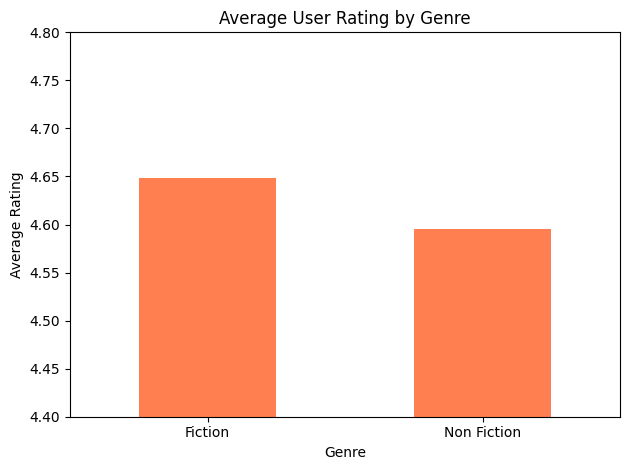

In [21]:
genre_rating = df.groupby('Genre')['User Rating'].mean()

genre_rating.plot(kind='bar', color='coral')
plt.title("Average User Rating by Genre")
plt.ylabel("Average Rating")
plt.xticks(rotation=0)
plt.ylim(4.4, 4.8)
plt.tight_layout()
plt.show()


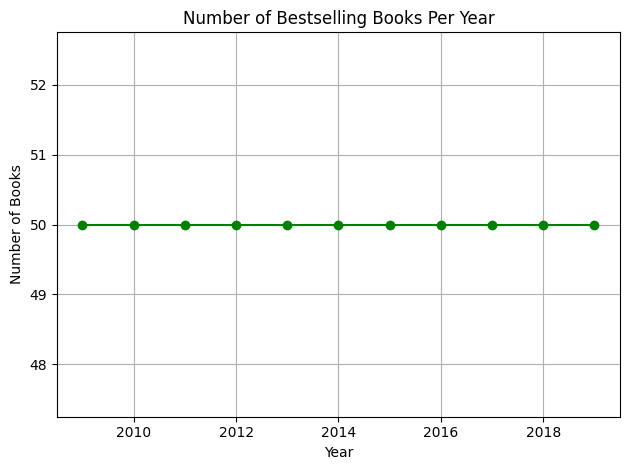

In [22]:
books_per_year = df['Year'].value_counts().sort_index()

books_per_year.plot(kind='line', marker='o', linestyle='-', color='green')
plt.title("Number of Bestselling Books Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Books")
plt.grid(True)
plt.tight_layout()
plt.show()


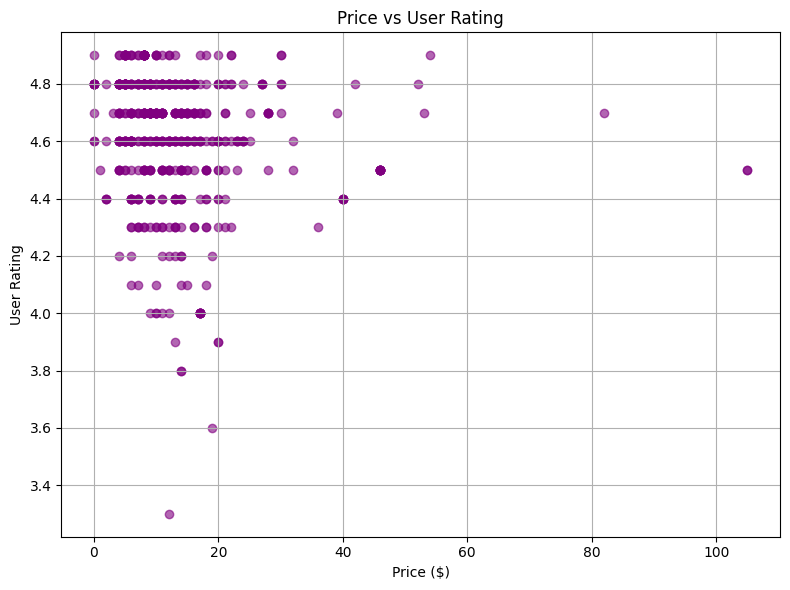

In [23]:
plt.figure(figsize=(8,6))
plt.scatter(df['Price'], df['User Rating'], alpha=0.6, color='purple')
plt.title("Price vs User Rating")
plt.xlabel("Price ($)")
plt.ylabel("User Rating")
plt.grid(True)
plt.tight_layout()
plt.show()


In [24]:
## 📌 Conclusion

Here’s a quick summary of the key insights from the Amazon Bestsellers dataset:

- **Jeff Kinney**, **Suzanne Collins**, and **Gary Chapman** are the most frequent bestselling authors.
- **Fiction** slightly outperforms **Non Fiction** in average user rating.
- Each year from 2009 to 2019 consistently has **50 bestsellers**, ensuring fair year-to-year comparisons.
- There’s no strong relationship between **book price and rating** — readers enjoy both cheap and premium books.
- **Fiction books** tend to be cheaper overall than Non Fiction.

This notebook demonstrates basic data cleaning, exploration, and visualization in Python — ideal for a data analysis portfolio.


SyntaxError: invalid character '’' (U+2019) (4088555870.py, line 3)

In [25]:
import os
os.getcwd()


'C:\\Users\\Mahad Shahid'